# Final Project 2

---

### Anggota kelompok : 
1. Irin Lutfitasari
2. Lukman Prasetyo Nugroho
3. Robi Dwiputra Satria

**PYTN-KS-09** <br>
**Studi Independen - Kampus Merdeka**

## Daftar Isi

* Perkenalan
* Import Pustaka
* Data Loading
* Data Cleaning
* Eksplorasi Data
* Data Preprocessing
* Pendefinisian model
* Pelatihan model
* Evaluasi Model
* Model Inference
* Kesimpulan

---
## Perkenalan

### Latar Belakang
Cuaca merupakan faktor alam yang dapat mempengaruhi kegiatan manusia. Untuk menghindari pengaruh cuaca yang tidak diinginkan, manusia harus melakukan kegiatan yang sesuai dengan keadaan cuaca tersebut. Pada cuaca hujan, aktivitas manusia seperti melakukan berbagai aktivitas akan sedikit terganggu. Maka diperlukan suatu model algoritma untuk memprediksi cuaca harian hujan. Model tersebut dapat dibentuk dengan memanfaatkan data-data historikal pengamatan cuaca harian dari berbagai lokasi di Australia sebelumnya dan mengetahui faktor-faktor yang berkorelasi kuat terhadap variabel dependen (hasil). Pemodelan menggunakan algoritma regresi logistik dan SVM melibatkan variabel variabel yang mempengaruhi terjadinya hujan antara lain seperti suhu, kelembapan, tekanan udara dan sebagainya.

### Data
Dataset ["Rain in Australia"](https://www.kaggle.com/jsphyg/weather-dataset-rattle-package) yang diperoleh dari kaggle berisikan terkait data-data historikal pengamatan cuaca harian sekitar 10 tahun dari berbagai lokasi di Australia. Dataset ini terdiri dari 23 atribut dan 145460 data. Variabel independen (prediktor) mampu memprediksi variabel dependen (hasil) serta variabel mana yang memberi dampak signifikan terhadap hasil prediksi. Dalam analisis model ini, variabel dependen (hasil) yang menjadi target yaitu atribut RainTomorrow yang berisi "No" (tidak terjadi hujan besok harinya) dan "Yes" (terjadi hujan besok harinya 1mm atau lebih).  Sedangkan atribut lainnya merupakan variabel independen (prediktor).

### Penjelasan Atribut/Fitur Dataset

**Atribut bertipe numerikal:**
* Date - tanggal hari itu
* MinTemp - temperatur terendah hari itu dalam celcius
* MaxTemp - temperatur tertinggi hari itu dalam celcius
* Rainfall - jumlah curah hujan hari itu dalam mm
* Evaporation - jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
* Sunshine - jumlah jam hari itu cerah dengan cahaya matahari jam 12 malam hari itu
* Date - tanggal hari itu
* WindGustSpeed - kecepatan angin yang paling tinggi dalam km/jam selama 24 jam sebelum jam 12 malam hari itu
* WindSpeed9am - kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
* WindSpeed3pm - kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
* Humidity9am - humiditas jam 9 pagi dalam persen
* Humidity3pm - humiditas jam 3 sore dalam persen
* Pressure9am - tekanan udara jam 9 pagi dalam hpa
* Pressure3pm - tekanan udara jam 3 sore dalam hpa
* Cloud9am - persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
* Cloud3pm - persentase langit yang tertutup awan jam 3 sore
* Temp9am - temperatur jam 9 pagi dalam celcius
* Temp3pm - temperatur jam 3 sore dalam celcius melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
* RainTomorrow - variable yang akan diprediksi

**Atribut bertipe kategorikal:**
* Location - lokasi, nama kota di Australia
* WindGustDir - arah kecepatan angin yang paling tinggi selama 24 jam sebelum
* WindDir9am - arah angin jam 9 pagi
* WindDir3pm - arah angin jam 3 sore
* RainToday - apakah hari ini hujan: jika curah hujan 24 jam sebelum jam 9 pagi

### Tujuan
> Membuat model prediktif klasifikasi biner dengan menggunakan algoritma Logistic Regression (Regresi Logistik) dan Support Vector Machine (SVM) untuk memprediksi turun hujan dan memperkirakan faktor-faktor yang berpengaruh secara signifikan dalam memprediksi turunnya hujan di Australia.

---
## Import Pustaka

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import MinMaxScaler, LabelBinarizer, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.impute import SimpleImputer
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

import pickle

---
## Data Loading

Mengimport dataset yang akan digunakan

In [2]:
df = pd.read_csv('weatherAUS.csv')

Melihat 5 baris teratas dari dataset

In [3]:
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Melihat 5 baris terbawah dari dataset

In [4]:
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,...,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Melihat dimensi (baris, kolom) dataset

In [5]:
baris, kolom = df.shape
print(baris, 'baris')
print(kolom, 'kolom')

145460 baris
23 kolom


Melihat informasi tipe data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Interpretasi:** Berdasarkan informasi dataset, terdapat 2 tipe data yang berbeda pada atribut, yaitu tipe float sebanyak 16, dan object sebanyak 7.

Melihat deskripsi statistik tipe data numerik

In [7]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Melihat deskripsi statistik tipe data kategorik

In [8]:
df.describe(include='O')

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


Melihat jumlah nilai unik untuk setiap atribut

In [9]:
for i in df.columns:
    print('Jumlah nilai unik untuk atribut {}: {}'.format(i, len(df[i].unique())))

Jumlah nilai unik untuk atribut Date: 3436
Jumlah nilai unik untuk atribut Location: 49
Jumlah nilai unik untuk atribut MinTemp: 390
Jumlah nilai unik untuk atribut MaxTemp: 506
Jumlah nilai unik untuk atribut Rainfall: 682
Jumlah nilai unik untuk atribut Evaporation: 359
Jumlah nilai unik untuk atribut Sunshine: 146
Jumlah nilai unik untuk atribut WindGustDir: 17
Jumlah nilai unik untuk atribut WindGustSpeed: 68
Jumlah nilai unik untuk atribut WindDir9am: 17
Jumlah nilai unik untuk atribut WindDir3pm: 17
Jumlah nilai unik untuk atribut WindSpeed9am: 44
Jumlah nilai unik untuk atribut WindSpeed3pm: 45
Jumlah nilai unik untuk atribut Humidity9am: 102
Jumlah nilai unik untuk atribut Humidity3pm: 102
Jumlah nilai unik untuk atribut Pressure9am: 547
Jumlah nilai unik untuk atribut Pressure3pm: 550
Jumlah nilai unik untuk atribut Cloud9am: 11
Jumlah nilai unik untuk atribut Cloud3pm: 11
Jumlah nilai unik untuk atribut Temp9am: 442
Jumlah nilai unik untuk atribut Temp3pm: 503
Jumlah nilai un

Melihat nilai unik pada kolom **RainToday** dan **RainTomorrow**

In [10]:
df['RainToday'].unique()

array(['No', 'Yes', nan], dtype=object)

In [11]:
df['RainTomorrow'].unique()

array(['No', 'Yes', nan], dtype=object)

Melihat jumlah data pada kolom  **RainToday** dan **RainTomorrow**

In [12]:
df['RainToday'].value_counts()

No     110319
Yes     31880
Name: RainToday, dtype: int64

In [13]:
df['RainToday'].value_counts(normalize=True) * 100

No     77.580714
Yes    22.419286
Name: RainToday, dtype: float64

In [14]:
df['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

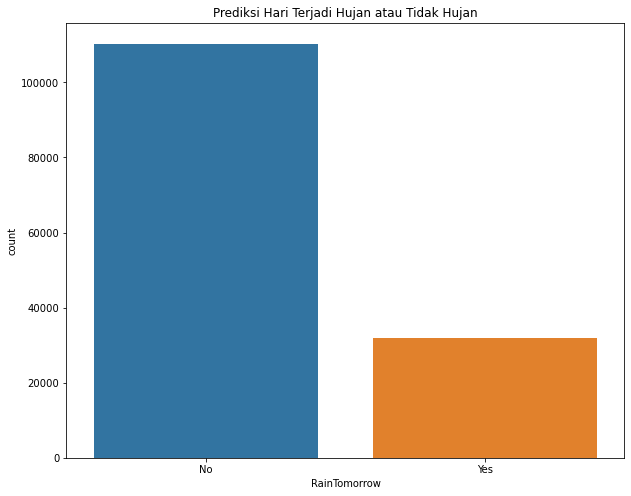

In [15]:
plt.figure(figsize=(10,8))
sns.countplot(df['RainTomorrow'])
plt.title('Prediksi Hari Terjadi Hujan atau Tidak Hujan')
plt.show()

In [16]:
df['RainTomorrow'].value_counts(normalize=True) * 100

No     77.581878
Yes    22.418122
Name: RainTomorrow, dtype: float64

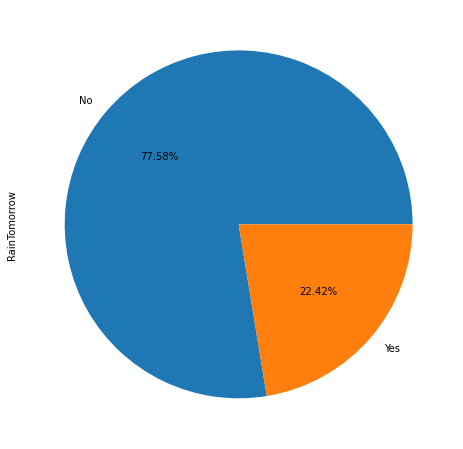

In [17]:
plt.figure(figsize=(10,8))
df['RainTomorrow'].value_counts().plot.pie(autopct='%1.2f%%')
plt.show()

**Interpretasi:** Berdasarkan data persentase hari berikutnya terjadi hujan sebesar 22,42%, sedangkan persentase  tidak hujan sebesar 77,58%. Maka, kelas target tersebut tidak seimbang.

In [18]:
# menggabungkan keseluruhan tipe data numerik yang tersimpan pada list 'num_cols'
num_cols = list(df.select_dtypes(include='number'))

# menggabungkan keseluruhan tipe data kategorik yang tersimpan pada list 'cat_cols'
cat_cols = list(df.select_dtypes(include='object'))

print(f"Fitur numerikal :\n{num_cols}")
print(f"Fitur kategorikal :\n{cat_cols}")

Fitur numerikal :
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Fitur kategorikal :
['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


Melakukan pengecekan duplikasi data

In [19]:
df[df.duplicated()]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


Tidak terdapat duplikasi data

In [20]:
df.duplicated().sum()

0

---
## Data Cleaning

Bagian ini berisi proses penyiapan data berupa data cleaning sebelum
dilakukan explorasi data lebih lanjut.

**Melihat missing values**

In [21]:
df[df.isna().any(axis=1)]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Melakukan drop missing value yang ada pada atribut **'RainToday'** dan **'RainTomorrow'**

In [22]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

Mengubah tipe data atribut **'Date'** menjadi tipe datetime

In [23]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

In [24]:
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [25]:
# drop data 'Date' karena sudah diwakili oleh atribut 'Day', 'Month', 'Year'
df.drop(columns = ['Date'], inplace = True)

In [26]:
# menampilkan 5 baris teratas
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


Menggabungkan kembali keseluruhan tipe data numerik dan data kategorik, masing-masing tersimpan pada list 'num_cols' dan 'cat_cols'

In [27]:
# menggabungkan keseluruhan tipe data numerik yang tersimpan pada list 'num_cols'
num_cols = list(df.select_dtypes(include='number'))

# menggabungkan keseluruhan tipe data kategorik yang tersimpan pada list 'cat_cols'
cat_cols = list(df.select_dtypes(include='object'))

print(f"Fitur numerikal :\n{num_cols}")
print(f"Fitur kategorikal :\n{cat_cols}")

Fitur numerikal :
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Day', 'Month', 'Year']
Fitur kategorikal :
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']


#### Melihat jumlah missing values pada fitur bertipe numerik

In [28]:
missing_values=df[num_cols].isnull().sum()
missing_percentage=df[num_cols].isnull().sum()*100/len(df)
value={
   'missing_values':missing_values,
   'missing%':missing_percentage,
   'data types':df[num_cols].dtypes
}
frame=pd.DataFrame(value).sort_values(by='missing%', ascending=False)
frame

,missing_values,missing%,data types
Sunshine,66805,47.451114,float64
Evaporation,59694,42.400222,float64
Cloud3pm,56094,39.843167,float64
Cloud9am,52625,37.379161,float64
Pressure3pm,13769,9.780022,float64
Pressure9am,13743,9.761555,float64
WindGustSpeed,9105,6.467216,float64
Humidity3pm,3501,2.486735,float64
Temp3pm,2624,1.863808,float64
WindSpeed3pm,2531,1.797751,float64


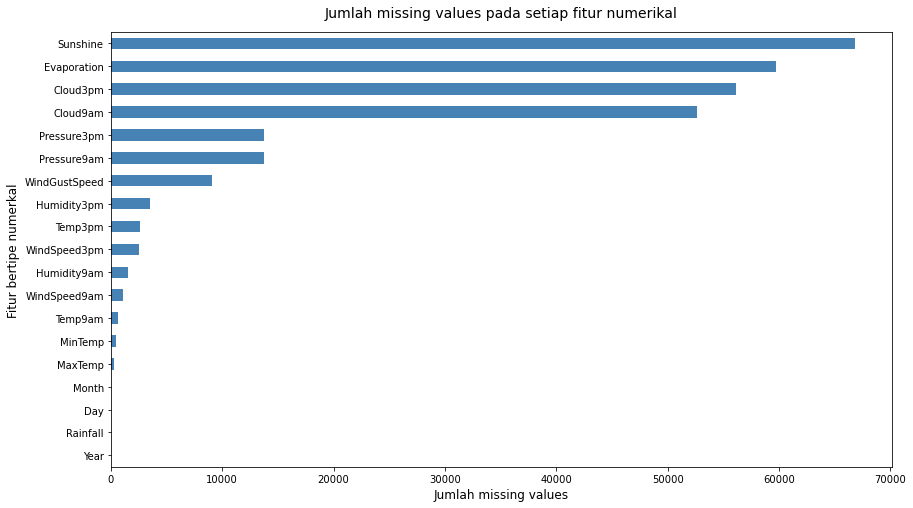

In [29]:
# melakukan plot bar horizontal untuk mengetahui missing values pada setiap fitur numerikal

missing_values_num =  df[num_cols].isnull().sum().sort_values()

missing_values_num.plot(kind='barh', figsize=(14, 8), color='steelblue')
plt.xlabel('Jumlah missing values', fontsize = 12)
plt.ylabel('Fitur bertipe numerkal', fontsize = 12)
plt.title('Jumlah missing values pada setiap fitur numerikal', fontsize = 14, y = 1.02)
plt.show()

**Analisis:** Berdasarkan visualisasi data di atas, terdapat missing values pada atribut **'Sunshine'** dan **'Evaporation'** yang mencapai lebih dari 40%, sedangkan untuk atribut **'Cloud3pm'** dan **'Cloud9am'** mencapai lebih dari 30%.

#### Melihat jumlah missing values pada fitur bertipe kategorik

In [30]:
missing_values_2 = df[cat_cols].isnull().sum()
missing_percentage_2 = df[cat_cols].isnull().sum()*100/len(df)
value_2={
   'missing_values':missing_values_2,
   'missing%':missing_percentage_2,
   'data types':df[cat_cols].dtypes
}
cat_frame = pd.DataFrame(value_2).sort_values(by='missing%', ascending=False)
cat_frame

,missing_values,missing%,data types
WindDir9am,9660,6.861429,object
WindGustDir,9163,6.508413,object
WindDir3pm,3670,2.606775,object
Location,0,0.000000,object
RainToday,0,0.000000,object
RainTomorrow,0,0.000000,object


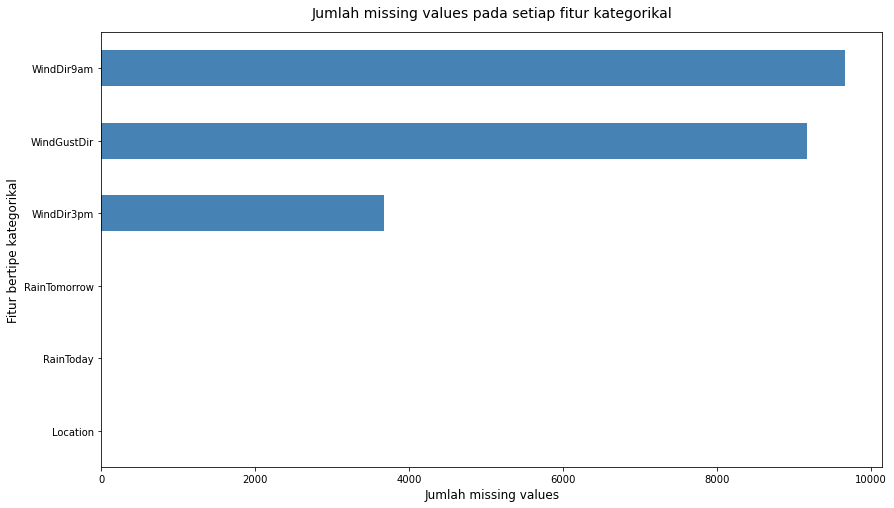

In [31]:
# melakukan plot bar horizontal untuk mengetahui missing values pada setiap fitur kategorikal

missing_values_cat =  df[cat_cols].isnull().sum().sort_values()

missing_values_cat.plot(kind='barh', figsize=(14, 8), color='steelblue')
plt.xlabel('Jumlah missing values', fontsize = 12)
plt.ylabel('Fitur bertipe kategorikal', fontsize = 12)
plt.title('Jumlah missing values pada setiap fitur kategorikal', fontsize = 14, y = 1.02)
plt.show()

**Analisis:** Berdasarkan grafik, terlihat bahwa terdapat missing values pada atribut **'WindDir9am'** dan **'WindGustDir'** mencapai sekitar 6%, sedangkan missing values untuk atribut **'WindDir3pm'** sekitar 2%.

#### Menangani Outlier

Boxplot dapat digunakan untuk mengecek outlier dalam data secara visual dan untuk mengidentifikasi distribusi data.

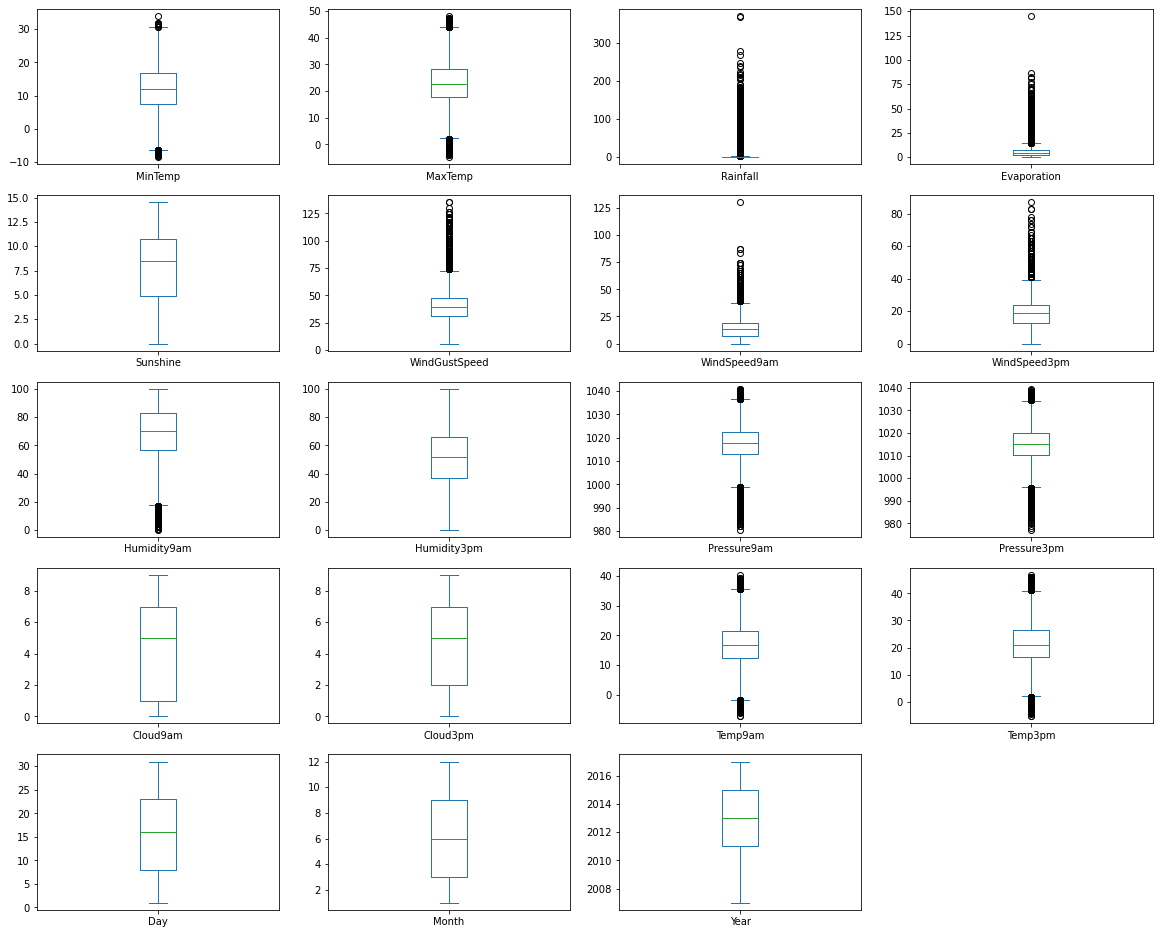

In [32]:
df[num_cols].plot(kind='box',subplots=True,layout=(6,4),figsize=(20,20));

In [33]:
# melihat deskripsi statistik tipe data numerik
df[num_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Day,Month,Year
count,140319.000000,140480.00000,140787.000000,81093.000000,73982.000000,131682.000000,139732.000000,138256.000000,139270.000000,137286.000000,127044.000000,127018.000000,88162.000000,84693.000000,140131.000000,138163.000000,140787.000000,140787.000000,140787.000000
mean,12.184824,23.23512,2.349974,5.472516,7.630540,39.970520,13.990496,18.631141,68.826833,51.449288,1017.654577,1015.257963,4.431161,4.499250,16.987066,21.693183,15.714704,6.403482,2012.757492
std,6.403879,7.11450,8.465173,4.189132,3.781729,13.578201,8.886210,8.798096,19.063650,20.807310,7.104867,7.035411,2.886594,2.719752,6.496012,6.937784,8.798882,3.426583,2.542272
min,-8.500000,-4.80000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,1.000000,1.000000,2007.000000
25%,7.600000,17.90000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.000000,1010.400000,1.000000,2.000000,12.300000,16.600000,8.000000,3.000000,2011.000000
50%,12.000000,22.60000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,16.000000,6.000000,2013.000000
75%,16.800000,28.30000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,23.000000,9.000000,2015.000000
max,33.900000,48.10000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,31.000000,12.000000,2017.000000


**Analisis:** Berdasarkan grafik boxplot, terlihat bahwa banyak outlier dalam dataset. Outlier ini dapat diatasi menggunakan IQR. Terutama atribut **'Rainfall'**, **'Evaporation'**, **'WindSpeed9am'** dan **'Windspeed3pm'** tampaknya memiliki outlier yang mencurigakan, karena memiliki nilai yang sangat tinggi di atas keragamannya.

In [34]:
# mengumpulkan fitur numerikal yang memiliki outlier dalam suatu list

feature_outliers = ['MinTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 
                    'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Temp3pm', 'Temp9am', 'MaxTemp', 'Pressure3pm']

Mengatasi outlier dengan IQR

In [35]:
for feature in feature_outliers:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_bound = df[feature].quantile(0.25) - (1.5*IQR)
    upper_bound = df[feature].quantile(0.75) + (1.5*IQR)
    print(feature,'memiliki outlier ketika',feature,'kurang dari {} dan lebih dari {}'.format(round(lower_bound, 2), 
                                                                                              (round(upper_bound, 2))))
    df.loc[(df[feature]<lower_bound ),feature] = lower_bound 
    df.loc[(df[feature]>upper_bound),feature] = upper_bound

MinTemp memiliki outlier ketika MinTemp kurang dari -6.2 dan lebih dari 30.6
Rainfall memiliki outlier ketika Rainfall kurang dari -1.2 dan lebih dari 2.0
Evaporation memiliki outlier ketika Evaporation kurang dari -4.6 dan lebih dari 14.6
WindGustSpeed memiliki outlier ketika WindGustSpeed kurang dari 5.5 dan lebih dari 73.5
WindSpeed9am memiliki outlier ketika WindSpeed9am kurang dari -11.0 dan lebih dari 37.0
WindSpeed3pm memiliki outlier ketika WindSpeed3pm kurang dari -3.5 dan lebih dari 40.5
Humidity9am memiliki outlier ketika Humidity9am kurang dari 18.0 dan lebih dari 122.0
Pressure9am memiliki outlier ketika Pressure9am kurang dari 998.9 dan lebih dari 1036.5
Temp3pm memiliki outlier ketika Temp3pm kurang dari 1.9 dan lebih dari 41.1
Temp9am memiliki outlier ketika Temp9am kurang dari -1.65 dan lebih dari 35.55
MaxTemp memiliki outlier ketika MaxTemp kurang dari 2.3 dan lebih dari 43.9
Pressure3pm memiliki outlier ketika Pressure3pm kurang dari 996.0 dan lebih dari 1034.4


Memvisualisasi data menggunakan boxplot untuk memastikan kembali outlier sudah diatasi dengan IQR

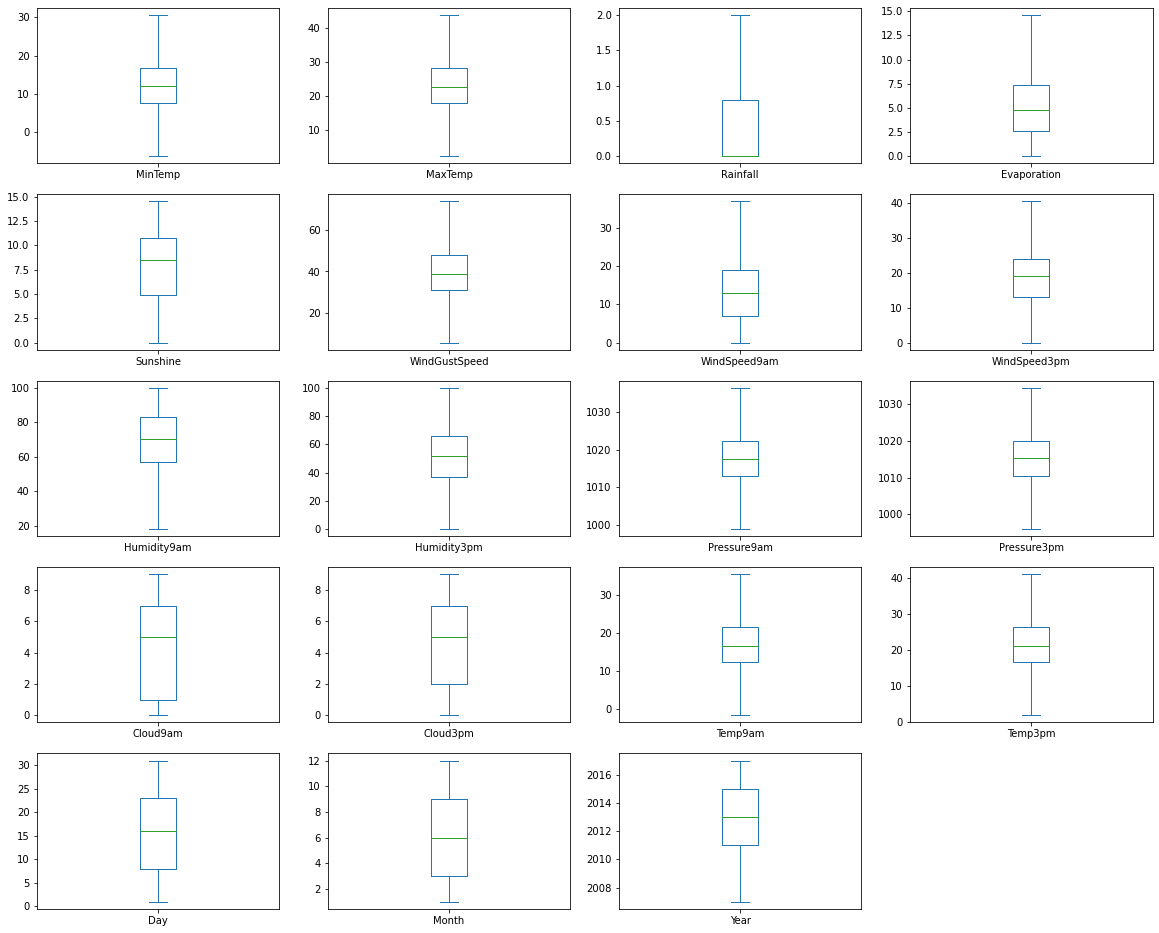

In [36]:
df[num_cols].plot(kind='box',subplots=True,layout=(6,4),figsize=(20,20));

#### Menangani missing values

- Missing value pada atribut bertipe numerikal akan ditangani dengan imputasi median, karena nilai median tidak lebih sensitif terhadap outlier jika dibandingkan dengan nilai mean.
- Missing value pada atribut bertipe kategorikal akan ditangani dengan imputasi modus.

#### Mengatasi missing values pada atribut numerikal

In [37]:
for feature in num_cols:
    df[feature].fillna(df[feature].median(),inplace=True)

#### Mengatasi missing values pada atribut kategorikal

In [38]:
for featuremode in cat_cols:
    df[featuremode].fillna(df[featuremode].mode()[0], inplace=True)

In [39]:
num_cols_without_date = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                         'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
                         'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

---
## Eksplorasi Data

Bagian ini berisi explorasi data pada dataset dengan menggunakan
query, grouping, visualisasi sederhana, dan lain sebagainya.

Melakukan visualisasi data numerikal untuk mengetahui distribusi data

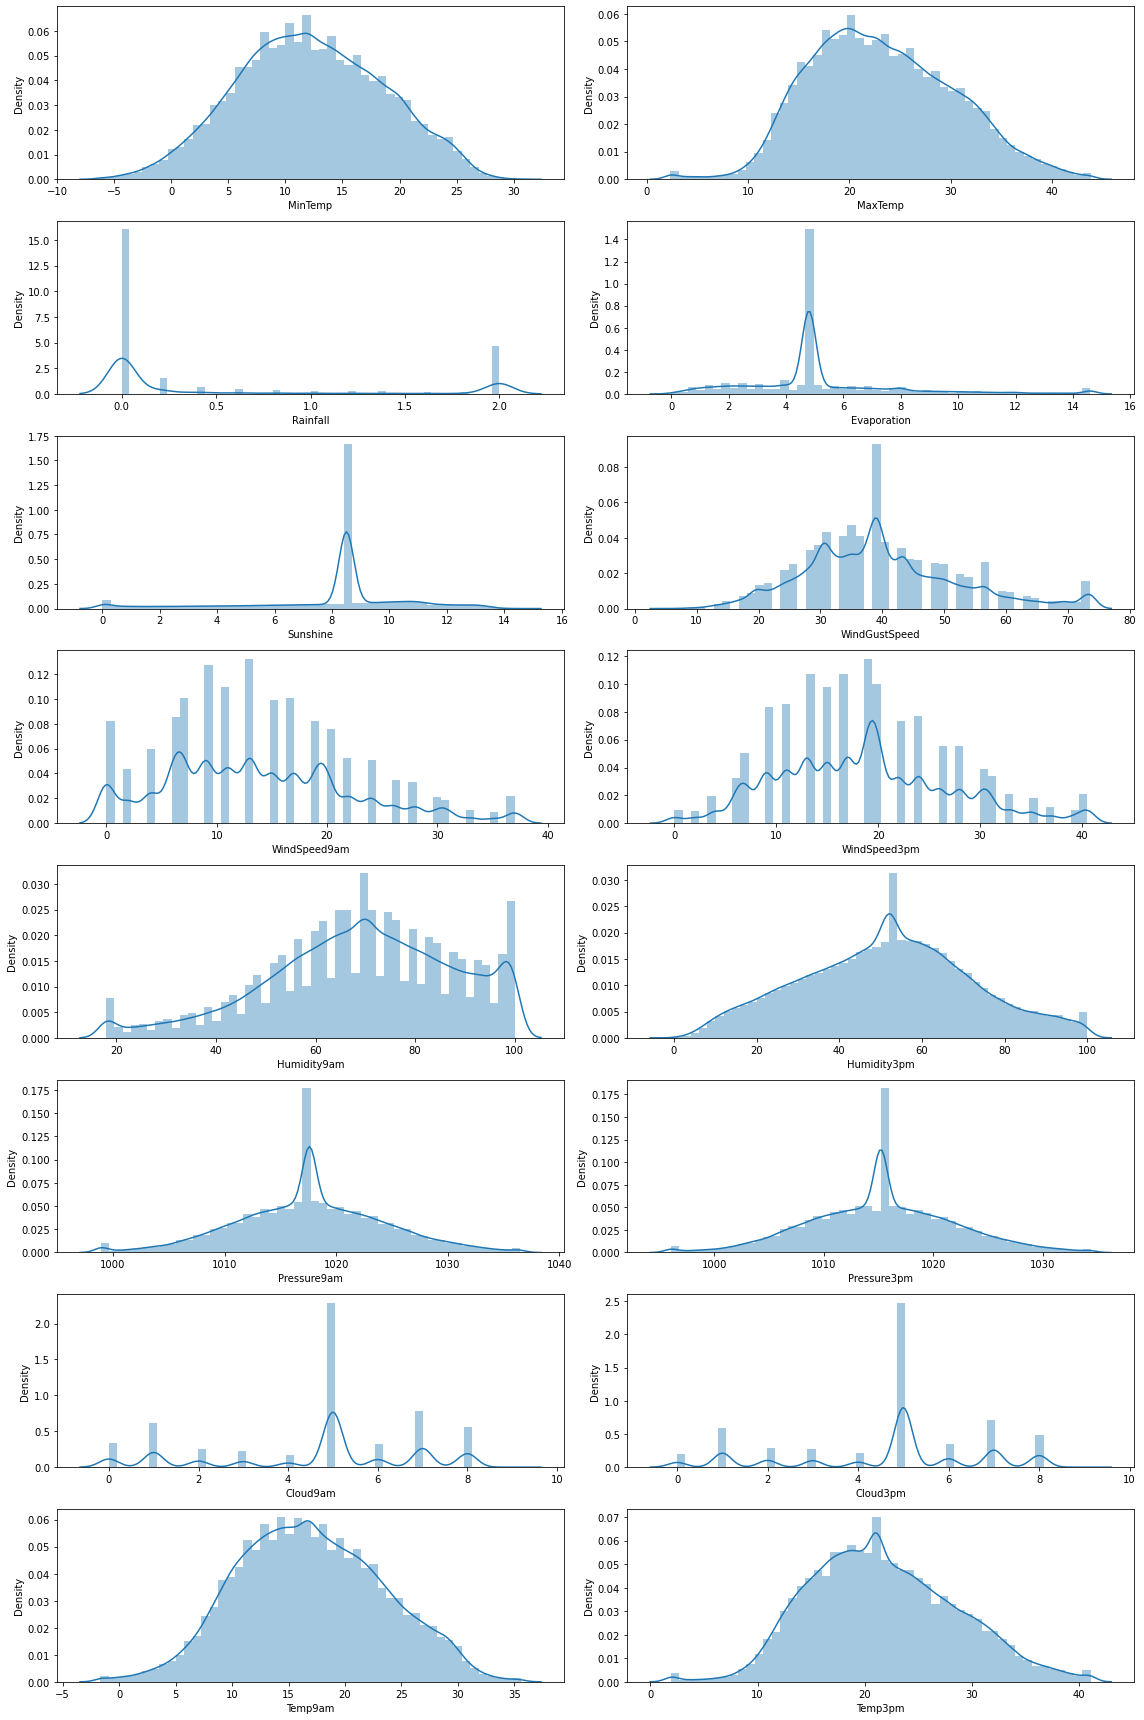

In [40]:
fig, axes = plt.subplots(8,2, figsize=(16, 24))
for i, col in enumerate(num_cols_without_date):        
    ax_ = sns.distplot(df[col], ax=axes.flatten()[i])
plt.tight_layout()  

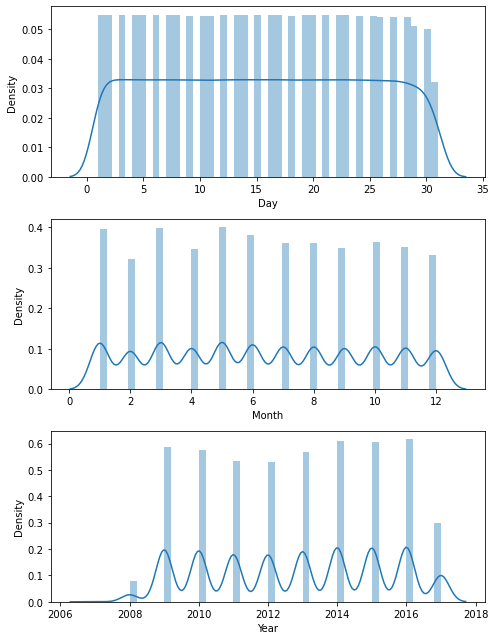

In [41]:
fig, axes = plt.subplots(3, 1, figsize=(7, 9))
for i, col in enumerate(['Day', 'Month', 'Year']):        
    ax_ = sns.distplot(df[col], ax=axes.flatten()[i])
plt.tight_layout()  

Keterangan Skewness:
* Cukup simetris (_fairly symmetrical_) : -0.5 to 0.5
* Kemiringan sedang dengan skewness negatif (_moderate skewed_) : -0.5 to -1.0 
* Kemiringan sedang dengan skewness positif (_moderate skewed_) : 0.5 to 1.0
* Kemiringan berat (_highly skewed_) : <-1.0 and > 1.0

In [42]:
# mengurutkan nilai skewness
df[num_cols_without_date].skew().sort_values(ascending=False)

Evaporation      1.301236
Rainfall         1.239904
WindGustSpeed    0.589019
WindSpeed9am     0.509169
WindSpeed3pm     0.398259
Temp3pm          0.263184
MaxTemp          0.243694
Temp9am          0.096425
Humidity3pm      0.032842
MinTemp          0.027151
Pressure3pm      0.016201
Pressure9am     -0.011177
Humidity9am     -0.435124
Cloud9am        -0.546757
Cloud3pm        -0.559368
Sunshine        -1.105903
dtype: float64

In [43]:
# membuat dataframe skewness untuk setiap atribut numerik
df_skew = pd.DataFrame(df[num_cols].skew().sort_values(ascending=False))
df_skew.rename(columns={0 : 'Skewness'}, inplace=True)

In [44]:
df_skew

,Skewness
Evaporation,1.301236
Rainfall,1.239904
WindGustSpeed,0.589019
WindSpeed9am,0.509169
WindSpeed3pm,0.398259
Temp3pm,0.263184
MaxTemp,0.243694
Temp9am,0.096425
Humidity3pm,0.032842
Month,0.028519


In [45]:
# seleksi baris untuk skewness cukup simetris (fairly symmetrical)
df_skew_fs = df_skew[(df_skew['Skewness'] >= -0.5) & (df_skew['Skewness'] <= 0.5)]

# seleksi baris untuk skewness negatif (moderate skewed)
df_skew_ms1 = df_skew[(df_skew['Skewness'] <= -0.5) & (df_skew['Skewness'] >= -1.0)]

# seleksi baris untuk skewness positif (moderate skewed)
df_skew_ms = df_skew[(df_skew['Skewness'] >= 0.5) & (df_skew['Skewness'] <= 1.0)]

# seleksi baris untuk highly skewed
df_skew_hs = df_skew[(df_skew['Skewness'] <= -1.0) | (df_skew['Skewness'] >= 1.0)]

In [46]:
# skewness cukup simetris (fairly symmetrical)
df_skew_fs

,Skewness
WindSpeed3pm,0.398259
Temp3pm,0.263184
MaxTemp,0.243694
Temp9am,0.096425
Humidity3pm,0.032842
Month,0.028519
MinTemp,0.027151
Pressure3pm,0.016201
Day,0.008715
Pressure9am,-0.011177


In [47]:
# skewness negatif (moderate skewed)
df_skew_ms1

,Skewness
Cloud9am,-0.546757
Cloud3pm,-0.559368


In [48]:
# skewness positif (moderate skewed)
df_skew_ms

,Skewness
WindGustSpeed,0.589019
WindSpeed9am,0.509169


In [49]:
# highly skewed
df_skew_hs

,Skewness
Evaporation,1.301236
Rainfall,1.239904
Sunshine,-1.105903


**Analisis:** 
- Atribut 'MinTemp', 'MaxTemp', 'Pressure9am', 'Pressure3pm', 'Temp3pm', 'Temp9am', 'Humidity3pm', 'Humidity9am' dan 'WindSpeed3pm' membentuk distribusi yang cukup simetris..
- Atribut 'Cloud9am' dan 'Cloud3pm' membentuk distribusi dengan ekor miring ke kiri (skewness negatif).
- Atribut 'WindGustSpeed' dan 'WindSpeed9am' membentuk distribusi dengan ekor miring ke ke kanan (skewness positif).
- Atribut 'Evaporation', 'Rainfall' dan 'Sunshine' membentuk distribusi dengan _highly skewed_.

Melakukan pengelompokkan data untuk mengetahui rata-rata curah hujan berdasarkan lokasi

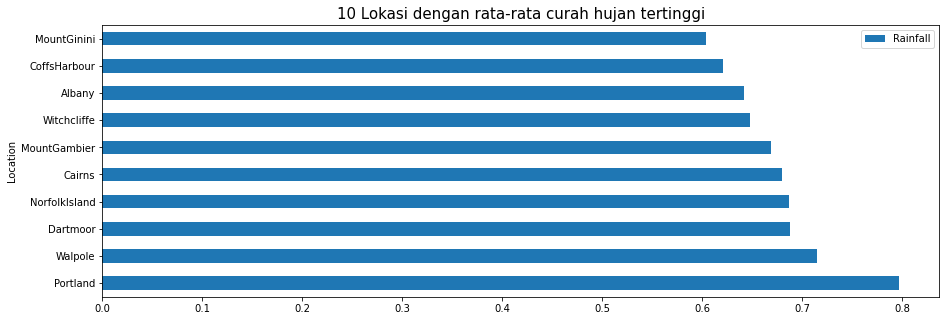

In [50]:
df_rain_loc = df.groupby('Location').agg({'Rainfall' : 'mean'}).sort_values(by='Rainfall', ascending=False).iloc[:10]
df_rain_loc.plot(kind='barh',figsize=(15,5))
plt.title ('10 Lokasi dengan rata-rata curah hujan tertinggi', fontsize=15)
plt.show()

**Interpretasi:** Berdasarkan grafik horizontal bar chart, terlihat bahwa rata-rata curah hujan tertinggi berada di wilayah Portland, dan wilayah MountGinini dengan rata-rata curah hujan terendah.

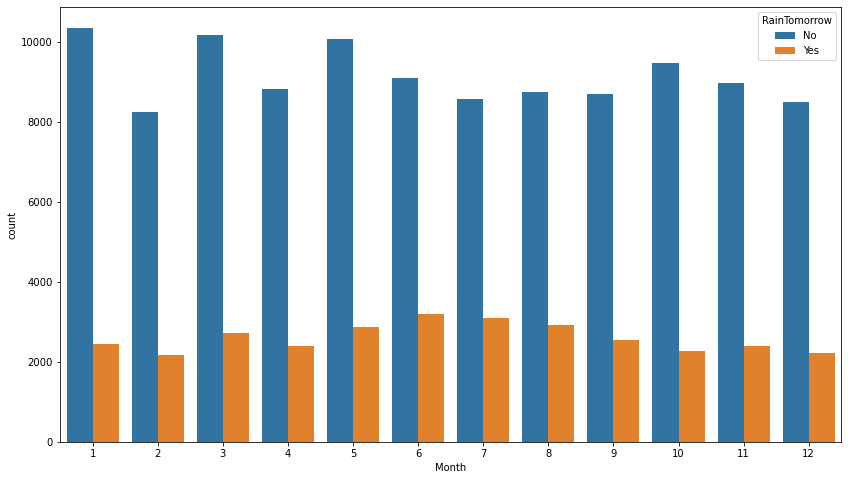

In [51]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Month', hue='RainTomorrow', data=df)
plt.show()

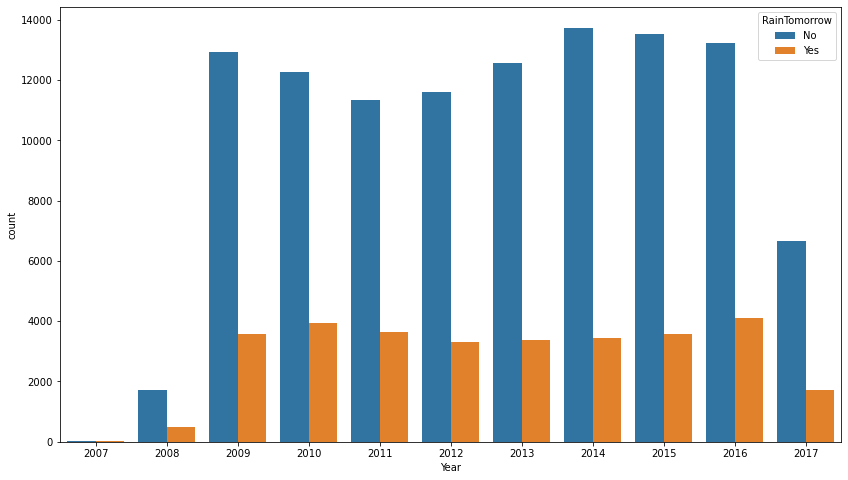

In [52]:
plt.figure(figsize=(14, 8))
sns.countplot(x='Year', hue='RainTomorrow', data=df)
plt.show()

**Interpretasi:** Grafik  di atas menunjukkan visualisasi dari prediksi terjadinya hujan tertinggi pada setiap bulan dan tahun. Berdasarkan grafik tersebut dapat analisis bahwa:
- Bulan pertama merupakan kejadian tidak terjadinya hujan tertinggi, jika dibandingkan dengan bulan lainnya.
- Tren penurunan jumlah hari tidak terjadinya hujan berada pada bulan 5-7 dan bulan 10-12.
- Tren peningkatan jumlah hari terjadinya hujan berada pada tahun 2014-2016. Sedangkan tren penurunan jumlah hari terjadinya hujan berada pada tahun tahun 2010-2012.

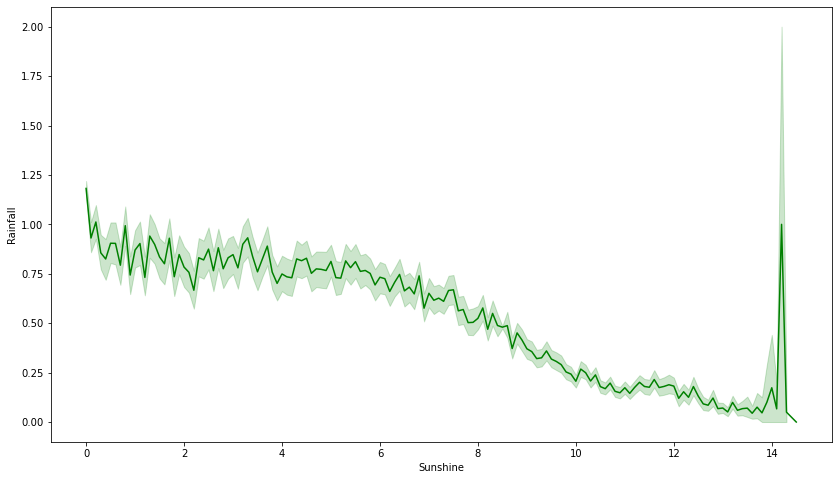

In [53]:
# visualisasi fitur 'Sunshine' terhadap fitur 'Rainfall'

plt.figure(figsize=(14,8))
sns.lineplot(data = df, x = 'Sunshine', y= 'Rainfall', color = 'green')
plt.show()

**Interpretasi:** Fitur **'Sunshine'** berbanding terbalik dengan fitur **'Rainfall'**. Artinya  terjadi korelasi negatif antara  jumlah jam suatu hari cerah terhadap intensitas curah hujan, semakin besar curah hujan, maka semakin kecil jumlah jam dalam hari tersebut cerah.

Memvisualisasi matriks korelasi-R antara fitur numerikal

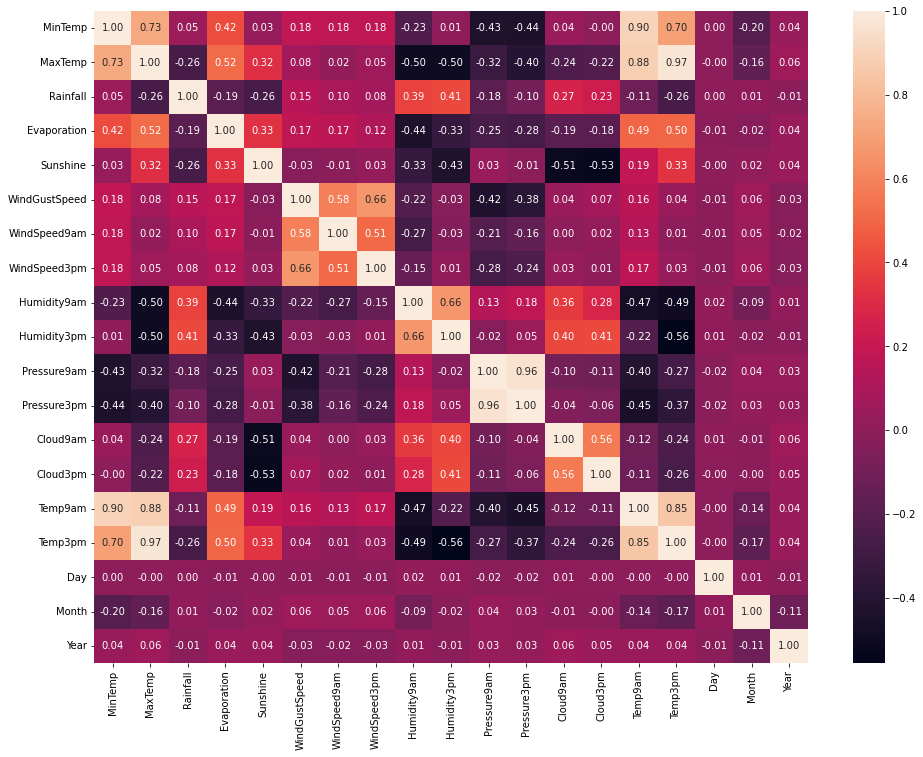

In [54]:
plt.figure(figsize=(16,12))
sns.heatmap(df[num_cols].corr(), annot=True, fmt='.2f')
plt.show()

Terlihat bahwa terdapat korelasi yang tinggi diantara atribut **'Temp9am'** dan **'MinTemp'**, **'Temp9am'** dan **'MaxTemp'**, **'Temp3pm' dan 'MaxTemp'**, **'Pressure3pm'** dan **'Pressure9am'**, **'Temp3pm' dan 'Temp9am'** yang artinya atribut tersebut merepresentasikan informasi yang sama. Oleh karena itu, atribut dengan korelasi tinggi cukup satu yang mewakili, maka harus dikeluarkan salah satu.

In [55]:
df_num_target = df.drop(columns=['Temp9am', 'MaxTemp', 'Pressure3pm'])

In [56]:
df_num_target.head()

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,0.6,4.8,8.5,W,44.0,W,WNW,20.0,...,22.0,1007.7,8.0,5.0,21.8,No,No,1,12,2008
1,Albury,7.4,0.0,4.8,8.5,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,5.0,5.0,24.3,No,No,2,12,2008
2,Albury,12.9,0.0,4.8,8.5,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,5.0,2.0,23.2,No,No,3,12,2008
3,Albury,9.2,0.0,4.8,8.5,NE,24.0,SE,E,11.0,...,16.0,1017.6,5.0,5.0,26.5,No,No,4,12,2008
4,Albury,17.5,1.0,4.8,8.5,W,41.0,ENE,NW,7.0,...,33.0,1010.8,7.0,8.0,29.7,No,No,5,12,2008


Mengubah tipe data target **'RainTomorrow'** ke bilangan biner

In [57]:
lb = LabelBinarizer()
df_num_target['RainTomorrow'] = lb.fit_transform(df_num_target['RainTomorrow'])

In [58]:
df_num_target.head(3)

,Location,MinTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,0.6,4.8,8.5,W,44.0,W,WNW,20.0,...,22.0,1007.7,8.0,5.0,21.8,No,0,1,12,2008
1,Albury,7.4,0.0,4.8,8.5,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,5.0,5.0,24.3,No,0,2,12,2008
2,Albury,12.9,0.0,4.8,8.5,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,5.0,2.0,23.2,No,0,3,12,2008


In [59]:
# membuat list untuk tipe data numerikal beserta data target

num_cols_with_target = ['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'Pressure9am', 'WindSpeed9am',
                        'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm',
                        'Temp3pm', 'RainTomorrow']

Memvisualisasi matriks korelasi-R fitur numerikal terhadap data target 

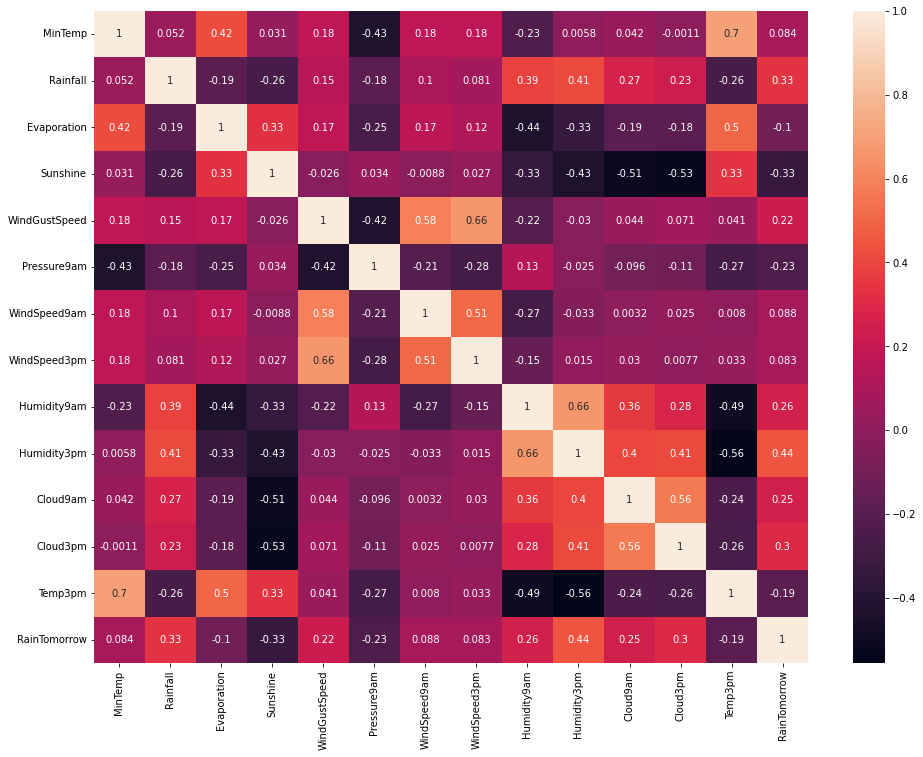

In [60]:
plt.figure(figsize=(16,12))
sns.heatmap(df_num_target[num_cols_with_target].corr(), annot=True)
plt.show()

**Analisis:**
- Fitur **'Rainfall'**, **'WindGustSpeed'**, **'Humidity9am'**, **'Humidity3pm'**, **'Cloud9am'**, dan **'Cloud3pm'** memiliki korelasi positif terhadap fitur target **'RainTomorrow'**.
- Fitur **'Sunshine'**, **'Pressure9am'** dan **'Temp3pm'** memiliki korelasi negatif terhadap fitur target **'RainTomorrow'**.

Mengubah tipe data kategorik ke bilangan biner

In [61]:
le = LabelEncoder()

In [62]:
df_num_target['WindGustDir'] = le.fit_transform(df_num_target['WindGustDir'])
df_num_target['WindDir9am'] = le.fit_transform(df_num_target['WindDir9am'])
df_num_target['WindDir3pm'] = le.fit_transform(df_num_target['WindDir3pm'])
df_num_target['Location'] = le.fit_transform(df_num_target['Location'])
df_num_target['RainToday'] = le.fit_transform(df_num_target['RainToday'])

Memvisualisasi matriks korelasi-R fitur kategorikal terhadap data target

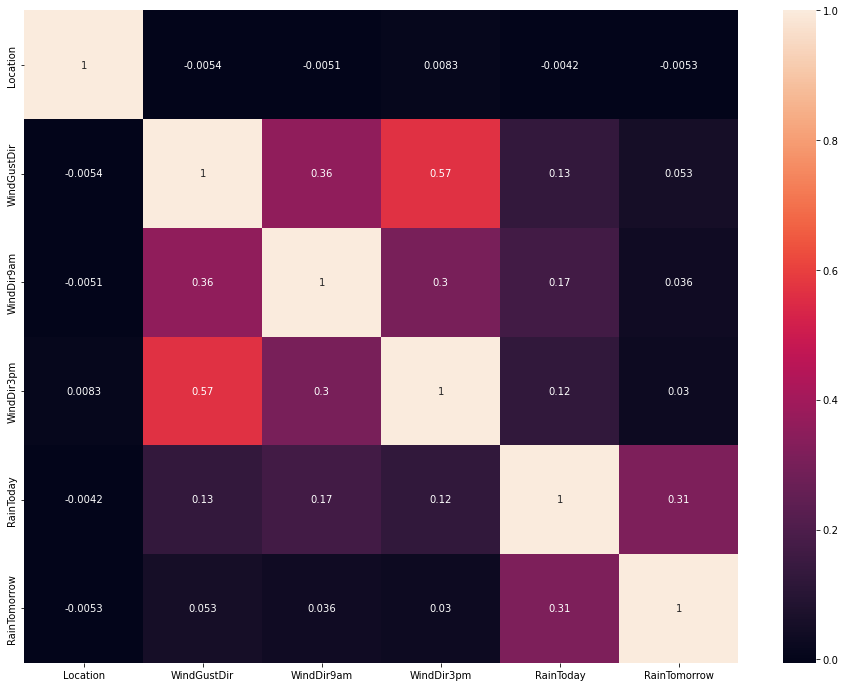

In [63]:
plt.figure(figsize=(16,12))
sns.heatmap(df_num_target[cat_cols].corr(), annot=True)
plt.show()

**Analisis:** Fitur **'RainToday'** memiliki korelasi positif terhadap fitur target **'RainTomorrow'**.

---
## Data Loading

Mengimport dataset yang akan digunakan

In [64]:
df = pd.read_csv('weatherAUS.csv')

Menghapus baris yang memiliki missing value pada atribut **'RainToday'** dan **'RainTomorrow'**

In [65]:
df.dropna(subset=['RainToday', 'RainTomorrow'], inplace=True)

Mengubah tipe data atribut **'Date'** menjadi tipe datetime

In [66]:
df['Date'] = pd.to_datetime(df['Date'], format='%Y-%m-%d', errors='coerce')

df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.drop(columns = ['Date'], inplace = True)

In [67]:
# mengumpulkan fitur numerikal yang memiliki outlier dalam suatu list

feature_outliers = ['MinTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 
                    'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Temp3pm']

In [68]:
for feature in feature_outliers:
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_bound = df[feature].quantile(0.25) - (1.5*IQR)
    upper_bound = df[feature].quantile(0.75) + (1.5*IQR)
    df.loc[(df[feature]<lower_bound ),feature] = lower_bound 
    df.loc[(df[feature]>upper_bound),feature] = upper_bound

In [69]:
df.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,3,12,2008
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,4,12,2008
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,5,12,2008


---
## Data Preprocessing

Bagian ini berisi proses penyiapan data untuk proses pelatihan model,
seperti pembagian data, transformasi data, dan proses-proses lain yang dibutuhkan.

Memisahkan variabel independen (prediktor) dan variabel dependen (hasil). Berdasarkan matriks korelasi sebelumnya tidak menggunakan atribut 'Temp9am', 'MaxTemp', 'Pressure3pm', karena sudah diwakili oleh fitur lainnya.

In [70]:
X = df.drop(columns=['RainTomorrow', 'Temp9am', 'MaxTemp', 'Pressure3pm'])
y = df['RainTomorrow']

print(f"Ukuran dimensi X yaitu {X.shape}" )
print(f"Ukuran dimensi y yaitu {y.shape}" )

Ukuran dimensi X yaitu (140787, 21)
Ukuran dimensi y yaitu (140787,)


In [71]:
y.value_counts()

No     109586
Yes     31201
Name: RainTomorrow, dtype: int64

Mengubah tipe data target menjadi bilangan biner

In [72]:
y.replace({'No': 0, 'Yes': 1}, inplace = True)

Membagi dataset menjadi data train dan data test dilakukan di awal untuk menghindari data leakage, dataset tersebut dibagi dengan ukuran test size = 20% dan train size = 80%

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 42)

In [74]:
print(f"Ukuran dimensi X_train: {X_train.shape}")
print(f"Ukuran dimensi X_test: {X_test.shape}")
print(f"Ukuran dimensi y_train: {y_train.shape}")
print(f"Ukuran dimensi y_test: {y_test.shape}")

Ukuran dimensi X_train: (112629, 21)
Ukuran dimensi X_test: (28158, 21)
Ukuran dimensi y_train: (112629,)
Ukuran dimensi y_test: (28158,)


In [75]:
X.isnull().sum()

Location             0
MinTemp            468
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed     9105
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am      1055
WindSpeed3pm      2531
Humidity9am       1517
Humidity3pm       3501
Pressure9am      13743
Cloud9am         52625
Cloud3pm         56094
Temp3pm           2624
RainToday            0
Day                  0
Month                0
Year                 0
dtype: int64

#### Melakukan penanganan missing values

In [76]:
num_cols_2 = ['MinTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
              'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
              'Cloud9am', 'Cloud3pm', 'Temp3pm', 'Day', 'Month', 'Year']

In [77]:
missing_values=df[num_cols_2].isnull().sum()
missing_percentage=df[num_cols_2].isnull().sum()*100/len(df)
value={
   'missing_values':missing_values,
   'missing%':missing_percentage,
   'data types':df[num_cols_2].dtypes
}
frame=pd.DataFrame(value).sort_values(by='missing%', ascending=False)
frame

,missing_values,missing%,data types
Sunshine,66805,47.451114,float64
Evaporation,59694,42.400222,float64
Cloud3pm,56094,39.843167,float64
Cloud9am,52625,37.379161,float64
Pressure9am,13743,9.761555,float64
WindGustSpeed,9105,6.467216,float64
Humidity3pm,3501,2.486735,float64
Temp3pm,2624,1.863808,float64
WindSpeed3pm,2531,1.797751,float64
Humidity9am,1517,1.077514,float64


In [78]:
num_missing_values = frame.drop(index=['Rainfall', 'Day', 'Month', 'Year'], axis=0)
null_num_cols = list(num_missing_values.T.columns)

In [79]:
X_train[null_num_cols].isnull().sum()

Sunshine         53560
Evaporation      47816
Cloud3pm         44868
Cloud9am         42101
Pressure9am      11043
WindGustSpeed     7286
Humidity3pm       2813
Temp3pm           2101
WindSpeed3pm      2019
Humidity9am       1209
WindSpeed9am       839
MinTemp            363
dtype: int64

Missing value pada kolom numerikal akan ditangani dengan imputasi median, karena nilai median tidak lebih sensitif terhadap outlier jika dibandingkan dengan nilai mean.

In [80]:
numerical_imputer = SimpleImputer(strategy='median')
numerical_imputer.fit(X_train[null_num_cols])
X_train[null_num_cols] = numerical_imputer.transform(X_train[null_num_cols])
X_test[null_num_cols] = numerical_imputer.transform(X_test[null_num_cols])

In [81]:
X_train[null_num_cols].isnull().sum()

Sunshine         0
Evaporation      0
Cloud3pm         0
Cloud9am         0
Pressure9am      0
WindGustSpeed    0
Humidity3pm      0
Temp3pm          0
WindSpeed3pm     0
Humidity9am      0
WindSpeed9am     0
MinTemp          0
dtype: int64

#### Tipe data kategorikal

In [82]:
cat_cols2 = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

In [83]:
X[cat_cols2].isnull().sum()

Location          0
WindGustDir    9163
WindDir9am     9660
WindDir3pm     3670
RainToday         0
dtype: int64

In [84]:
missing_values_2 = X[cat_cols2].isnull().sum()
missing_percentage_2 = X[cat_cols2].isnull().sum()*100/len(X)
value_2={
   'missing_values':missing_values_2,
   'missing%':missing_percentage_2
}
frame_2 = pd.DataFrame(value_2).sort_values(by='missing%', ascending=False)
frame_2

,missing_values,missing%
WindDir9am,9660,6.861429
WindGustDir,9163,6.508413
WindDir3pm,3670,2.606775
Location,0,0.000000
RainToday,0,0.000000


In [85]:
cat_cols_with_null = ['WindGustDir', 'WindDir9am', 'WindDir3pm']

Missing value pada kolom kategorikal akan ditangani dengan imputasi modus.

In [86]:
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_imputer.fit(X_train[cat_cols_with_null])
X_train[cat_cols_with_null] = categorical_imputer.transform(X_train[cat_cols_with_null])
X_test[cat_cols_with_null] = categorical_imputer.transform(X_test[cat_cols_with_null])

Menampilkan nilai-nilai unik (setelah encoding) pada fitur kategorik beserta keterangannya

In [87]:
le = LabelEncoder()
le.fit(X_train['Location'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("==="*37, '\n\n', f"Keterangan label pada fitur {cat_cols2[0]}:\n{le_name_mapping}\n")
print("==="*37, '\n')

le.fit(X_train['WindGustDir'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Keterangan label pada fitur {cat_cols2[1]}:\n{le_name_mapping}\n")
print("==="*37, '\n')

le.fit(X_train['WindDir9am'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Keterangan label pada fitur {cat_cols2[2]}:\n{le_name_mapping}\n")
print("==="*37, '\n')

le.fit(X_train['WindDir3pm'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Keterangan label pada fitur {cat_cols2[3]}:\n{le_name_mapping}\n")
print("==="*37, '\n')

le.fit(X_train['RainToday'])
le_name_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print(f"Keterangan label pada fitur {cat_cols2[4]}:\n{le_name_mapping}\n")
print("==="*37, '\n')


 Keterangan label pada fitur Location:
{'Adelaide': 0, 'Albany': 1, 'Albury': 2, 'AliceSprings': 3, 'BadgerysCreek': 4, 'Ballarat': 5, 'Bendigo': 6, 'Brisbane': 7, 'Cairns': 8, 'Canberra': 9, 'Cobar': 10, 'CoffsHarbour': 11, 'Dartmoor': 12, 'Darwin': 13, 'GoldCoast': 14, 'Hobart': 15, 'Katherine': 16, 'Launceston': 17, 'Melbourne': 18, 'MelbourneAirport': 19, 'Mildura': 20, 'Moree': 21, 'MountGambier': 22, 'MountGinini': 23, 'Newcastle': 24, 'Nhil': 25, 'NorahHead': 26, 'NorfolkIsland': 27, 'Nuriootpa': 28, 'PearceRAAF': 29, 'Penrith': 30, 'Perth': 31, 'PerthAirport': 32, 'Portland': 33, 'Richmond': 34, 'Sale': 35, 'SalmonGums': 36, 'Sydney': 37, 'SydneyAirport': 38, 'Townsville': 39, 'Tuggeranong': 40, 'Uluru': 41, 'WaggaWagga': 42, 'Walpole': 43, 'Watsonia': 44, 'Williamtown': 45, 'Witchcliffe': 46, 'Wollongong': 47, 'Woomera': 48}


Keterangan label pada fitur WindGustDir:
{'E': 0, 'ENE': 1, 'ESE': 2, 'N': 3, 'NE': 4, 'NNE': 5, 'NNW': 6, 'NW': 7, 'S': 8, 'SE': 9, 'SSE': 10, 'SSW': 

Mengubah tipe data kategorik ke bilangan biner

In [88]:
X_train['WindGustDir'] = le.fit_transform(X_train['WindGustDir'])
X_train['WindDir9am'] = le.fit_transform(X_train['WindDir9am'])
X_train['WindDir3pm'] = le.fit_transform(X_train['WindDir3pm'])
X_train['Location'] = le.fit_transform(X_train['Location'])
X_train['RainToday'] = le.fit_transform(X_train['RainToday'])

In [89]:
X_test['WindGustDir'] = le.fit_transform(X_test['WindGustDir'])
X_test['WindDir9am'] = le.fit_transform(X_test['WindDir9am'])
X_test['WindDir3pm'] = le.fit_transform(X_test['WindDir3pm'])
X_test['Location'] = le.fit_transform(X_test['Location'])
X_test['RainToday'] = le.fit_transform(X_test['RainToday'])

In [90]:
print(f'Jumlah missing values data X_Train : {X_train.isnull().sum().sum()}')
print(f'Jumlah missing values data X_Test : {X_test.isnull().sum().sum()}')

Jumlah missing values data X_Train : 0
Jumlah missing values data X_Test : 0


In [91]:
# reset index
X_train_num = X_train[num_cols_2].reset_index(drop=True)
X_test_num = X_test[num_cols_2].reset_index(drop=True)

In [92]:
X_train_cat = X_train[cat_cols2].reset_index(drop=True)
X_test_cat = X_test[cat_cols2].reset_index(drop=True)

In [93]:
X_train_num.isnull().sum()

MinTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Cloud9am         0
Cloud3pm         0
Temp3pm          0
Day              0
Month            0
Year             0
dtype: int64

In [94]:
X_train = X_train.reset_index(drop=True)
X_test = X_test.reset_index(drop=True)

In [95]:
y_train = y_train.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

Menggabungkan data tipe numerik dan kategorik ke X_train dan X_test

In [96]:
X_train = pd.concat([X_train_num, X_train_cat], axis=1)
X_test = pd.concat([X_test_num, X_test_cat], axis=1)

Membuat dataframebaru untuk X_train dan y_train

In [97]:
df_features = pd.concat([X_train, y_train], axis=1)

Memperkirakan informasi korelasi untuk variabel target diskrit

In [98]:
info = mutual_info_classif(X_train, y_train)

In [99]:
info = pd.Series(info)
info.index = X_train.columns
info.sort_values(ascending=False)

Humidity3pm      0.112370
Sunshine         0.064198
Cloud3pm         0.058209
Rainfall         0.051890
RainToday        0.044544
Cloud9am         0.040626
Humidity9am      0.036661
Pressure9am      0.030627
WindGustSpeed    0.026703
Temp3pm          0.022365
Location         0.013217
Evaporation      0.009902
WindSpeed3pm     0.008294
WindDir9am       0.007372
WindGustDir      0.007191
WindSpeed9am     0.005983
WindDir3pm       0.004030
MinTemp          0.003812
Month            0.002699
Year             0.000497
Day              0.000454
dtype: float64

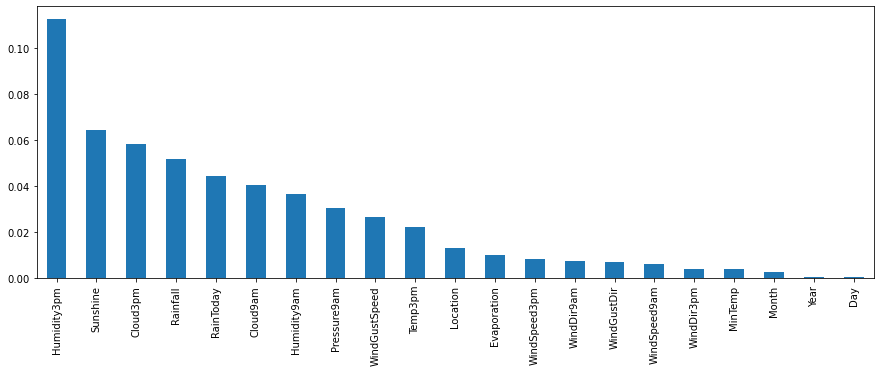

In [100]:
info.sort_values(ascending=False).plot.bar(figsize=(15,5))
plt.show()

Berdasarkan matriks korelasi dan seleksi fitur, dapat ditentukan 10 fitur yang berkorelasi tinggi terhadap data target **('RainTomorrow')** sebagai berikut:
- Sunshine
- Rainfall
- RainToday
- WindGustSpeed
- Cloud9am
- Cloud3pm
- Humidity9am
- Humidity3pm
- Pressure9am
- Temp3pm

In [101]:
features_imp = ['Sunshine', 'Rainfall', 'RainToday', 'WindGustSpeed', 'Cloud9am',
                'Cloud3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Temp3pm']

num_features = ['Sunshine', 'Rainfall', 'RainToday', 'WindGustSpeed', 'Cloud9am',
              'Cloud3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Temp3pm', 'RainTomorrow']

In [102]:
X_train = X_train[features_imp]
X_test = X_test[features_imp]

In [103]:
X_train[features_imp].head()

,Sunshine,Rainfall,RainToday,WindGustSpeed,Cloud9am,Cloud3pm,Humidity9am,Humidity3pm,Pressure9am,Temp3pm
0,8.5,0.0,0,44.0,5.0,8.0,42.0,17.0,1010.9,39.5
1,0.0,1.4,1,39.0,8.0,8.0,91.0,95.0,1019.0,11.7
2,8.5,1.8,1,39.0,5.0,5.0,98.0,99.0,1017.6,11.6
3,0.0,2.0,1,28.0,8.0,8.0,88.0,81.0,1025.6,14.9
4,8.5,2.0,1,50.0,5.0,5.0,100.0,39.0,1017.6,17.6


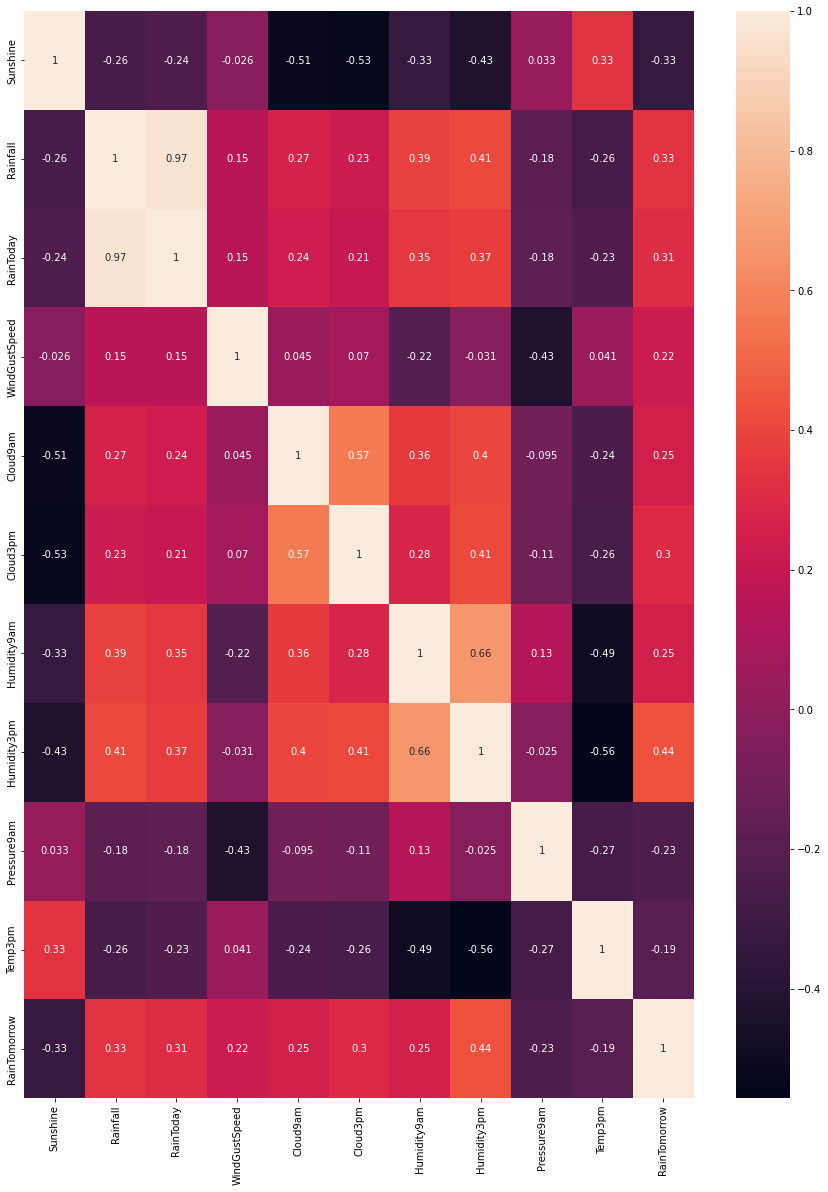

In [104]:
# membuat matriks korelasi-R terhadap data target
plt.figure(figsize=(15,20))
sns.heatmap(df_features[num_features].corr(), annot=True)
plt.show()

Melakukan feature scalling untuk membentuk skala dari 0 hingga 1 menggunakan MinMaxScaler

In [105]:
scaler = MinMaxScaler(feature_range=(0, 1)) 

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_test.columns)

In [106]:
print(f"Ukuran dimensi X_train: {X_train_scaled.shape}")
print(f"Ukuran dimensi X_test: {X_test_scaled.shape}")
print(f"Ukuran dimensi y_train: {y_train.shape}")
print(f"Ukuran dimensi y_test: {y_test.shape}")

Ukuran dimensi X_train: (112629, 10)
Ukuran dimensi X_test: (28158, 10)
Ukuran dimensi y_train: (112629,)
Ukuran dimensi y_test: (28158,)


---
##  Pendefinisian Model

Bagian ini berisi cell untuk mendefinisikan model sampai kompilasi model.

#### Model pertama : Logistic Regression
Model pertama yaitu Regresi Logistik (Logistic Regression). Model ini digunakan sebagai analisis regresi yang tepat dilakukan ketika variabel dependen bersifat dikotomik/biner. Hyperparameter secara default yang digunakan yakni solver = 'lbfgs' dan random_state=0 untuk menjamin model agar menghasilkan nilai yang konsisten.

In [107]:
logreg_model = LogisticRegression(solver = 'lbfgs', random_state = 0)

#### Model kedua : Support Vector Machine (SVM)
Model kedua yaitu SVM. Model ini bekerja dengan menemukan hyperplane yang secara maksimal memisahkan datapoint dari kelas yang berbeda. Hyperparameter secara default yang digunakan yakni kernel = 'rbf' dan random_state=0 untuk menjamin model agar menghasilkan nilai yang konsisten.

In [108]:
svm_model = SVC(kernel = 'rbf', random_state = 0)

---
## Pelatihan Model

Cell pada bagian ini hanya berisi code untuk melatih model dan output yang
dihasilkan.

In [109]:
model_1 = logreg_model.fit(X_train_scaled, y_train)

In [110]:
model_2 = svm_model.fit(X_train_scaled, y_train)

---
## Evaluasi Model

Pada bagian ini, dilakukan evaluasi model yang harus menunjukkan
bagaimana performa model berdasarkan metrics yang dipilih.

### Logistic Regression

In [111]:
y_pred_logreg = model_1.predict(X_test_scaled)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_logreg)}")
print(f"Train Data Score: {model_1.score(X_train_scaled, y_train)}")
print(f"Test Data Score: {model_1.score(X_test_scaled, y_test)}")

Accuracy Score: 0.8423183464734711
Train Data Score: 0.8399435314173082
Test Data Score: 0.8423183464734711


**Analisis:** Akurasi dari X Train (data pelatihan) dan X test (pengujian) memiliki nilai yang hampir sama. Maka, tidak ada masalah underfitting dan overfitting. Oleh karena itu, model ini menggeneralisasi dengan baik untuk data baru yang tidak terlihat sebelumnya.

In [112]:
print("Confusion Matrix:")
print("\n", confusion_matrix(y_test, y_pred_logreg))

Confusion Matrix:

 [[20638  1280]
 [ 3160  3080]]


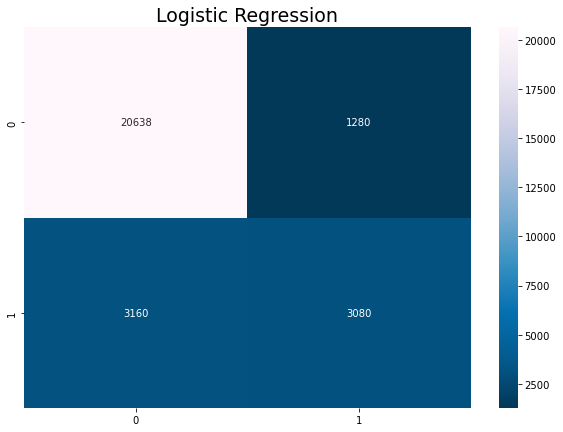

True Negative =  20638
False Positive =  1280
False Negative =  3160
True Positive =  3080


In [113]:
cm = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10, 7))
plt.title('Logistic Regression', fontsize=19)
sns.heatmap(cm, annot=True, fmt="d", cmap='PuBu_r')
plt.show()

print('True Negative = ', cm[0,0])
print('False Positive = ', cm[0,1])
print('False Negative = ', cm[1,0])
print('True Positive = ', cm[1,1])

In [114]:
print(classification_report(y_test, y_pred_logreg))

              precision    recall  f1-score   support

           0       0.87      0.94      0.90     21918
           1       0.71      0.49      0.58      6240

    accuracy                           0.84     28158
   macro avg       0.79      0.72      0.74     28158
weighted avg       0.83      0.84      0.83     28158



In [115]:
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg)
recall_logreg = recall_score(y_test, y_pred_logreg)
f1score_logreg = f1_score(y_test, y_pred_logreg)

In [116]:
index_logreg = ['Logistic Regression']
data_logreg = {'Akurasi' : accuracy_logreg, 'Presisi' : precision_logreg,
              'Recall' : recall_logreg, 'F1-Score' : f1score_logreg }

df_metrics_logreg = pd.DataFrame(data=data_logreg, index=index_logreg)
df_metrics_logreg = np.transpose(df_metrics_logreg)
df_metrics_logreg

,Logistic Regression
Akurasi,0.842318
Presisi,0.706422
Recall,0.493590
F1-Score,0.581132


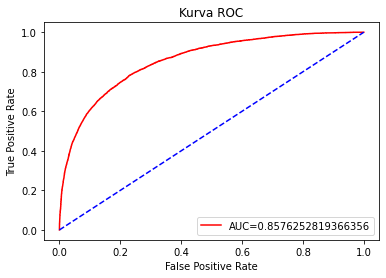

In [117]:
y_pred_logreg_proba = model_1.predict_proba(X_test_scaled)
fpr, tpr, threshhold = roc_curve(y_test, y_pred_logreg_proba[:,1])
auc_score = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr,tpr,'-r', label=f'AUC={auc_score}')
plt.plot([0,1], [0,1], 'b--' )

plt.title('Kurva ROC')
plt.xlabel("False Positive Rate")
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Interpretasi:** Terlihat bahwa skor AUC menunjukkan nilai dengan kisaran lebih dari 0.8, maka model tersebut mampu mengklasifikasikan fitur prediktor ke dalam target dengan baik.

### Support Vector Machine (SVM)

In [118]:
y_pred_svm = model_2.predict(X_test_scaled)
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_svm)}")
print(f"Train Data Score: {model_2.score(X_train_scaled, y_train)}")
print(f"Test Data Score: {model_2.score(X_test_scaled, y_test)}")

Accuracy Score: 0.8470772071880105
Train Data Score: 0.8464605030675936
Test Data Score: 0.8470772071880105


**Analisis:** Akurasi dari X Train (data pelatihan) dan X test (pengujian) memiliki nilai yang hampir sama. Maka, tidak ada masalah underfitting dan overfitting. Oleh karena itu, model ini menggeneralisasi dengan baik untuk data baru yang tidak terlihat sebelumnya.

In [119]:
print("Confusion Matrix:")
print("\n", confusion_matrix(y_test, y_pred_svm))

Confusion Matrix:

 [[21084   834]
 [ 3472  2768]]


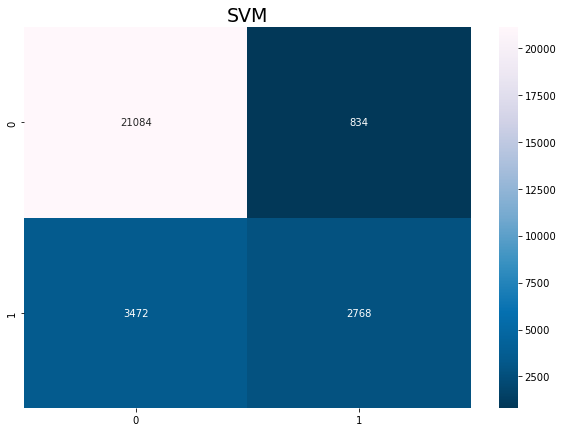

True Negative =  21084
False Positive =  834
False Negative =  3472
True Positive =  2768


In [120]:
cm_2 = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(10, 7))
plt.title('SVM', fontsize=19)
sns.heatmap(cm_2, annot=True, fmt="d", cmap='PuBu_r')
plt.show()

print('True Negative = ',cm_2[0,0])
print('False Positive = ',cm_2[0,1])
print('False Negative = ',cm_2[1,0])
print('True Positive = ',cm_2[1,1])

In [121]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91     21918
           1       0.77      0.44      0.56      6240

    accuracy                           0.85     28158
   macro avg       0.81      0.70      0.73     28158
weighted avg       0.84      0.85      0.83     28158



In [122]:
accuracy_svm = accuracy_score(y_test, y_pred_svm)
precision_svm = precision_score(y_test, y_pred_svm)
recall_svm = recall_score(y_test, y_pred_svm)
f1score_svm = f1_score(y_test, y_pred_svm)

In [123]:
index_svm = ['SVM']
data_svm = {'Akurasi' : accuracy_svm, 'Presisi' : precision_svm,
            'Recall' : recall_svm, 'F1-Score' : f1score_svm }

df_metrics_svm = pd.DataFrame(data=data_svm, index=index_svm)
df_metrics_svm = np.transpose(df_metrics_svm)
df_metrics_svm

,SVM
Akurasi,0.847077
Presisi,0.768462
Recall,0.443590
F1-Score,0.562487


#### Merangkum hasil evaluasi model

In [124]:
df_clsf_metrics = pd.concat([df_metrics_logreg, df_metrics_svm], axis=1).T
df_clsf_metrics

,Akurasi,Presisi,Recall,F1-Score
Logistic Regression,0.842318,0.706422,0.49359,0.581132
SVM,0.847077,0.768462,0.44359,0.562487


**Analisis:** 
- Hujan akan turun di Australia keesokan harinya dengan akurasi 84.2% untuk model Logistic Regression dan akurasi 84.7% untuk model SVM. Skor dapat dioptimalkan berdasarkan skor recall karena **lebih baik** memiliki situasi ketika model salah memprediksi terjadi hujan (Type I Error), jika dibandingkan dengan situasi ketika salah memprediksi tidak adanya hujan (Type II Error). Karena kelas target tidak seimbang, maka evaluasi juga dilakukan berdasarkan **F1-Score**. 
- Model Logistic Regression memiliki skor akurasi senilai 0.842, presisi senilai 0.706, dan recall senilai 0.493.
- Model SVM memiliki skor akurasi senilai 0.847, presisi senilai 0.768, dan recall senilai 0.443.
- Kedua model ini memberikan nilai metrik evaluasi yang tidak jauh berbeda, maka model Logistic Regression dan SVM dapat melakukan prediksi data baru dengan baik.

---
## Model Inference

Bagian ini diisi dengan model inference, di mana model yang sudah 
dilatih akan dicoba pada data selain data yang sudah tersedia.

In [125]:
new_data = {'Sunshine' : [4.2, 8.5, 7.3], 'Rainfall' : [0.3, 2.0, 1.5], 'RainToday' : [0, 1, 1], 'WindGustSpeed' : [6, 41, 46],
            'Cloud9am' : [4, 5, 9], 'Cloud3pm' : [2, 5, 8], 'Humidity9am' : [23, 89, 74],
            'Humidity3pm' : [52, 90, 72], 'Pressure9am' : [1004, 67, 1065.7], 'Temp3pm' : [997.6, 56, 1022.6]}
new_data = pd.DataFrame(new_data)
new_data

,Sunshine,Rainfall,RainToday,WindGustSpeed,Cloud9am,Cloud3pm,Humidity9am,Humidity3pm,Pressure9am,Temp3pm
0,4.2,0.3,0,6,4,2,23,52,1004.0,997.6
1,8.5,2.0,1,41,5,5,89,90,67.0,56.0
2,7.3,1.5,1,46,9,8,74,72,1065.7,1022.6


In [126]:
y_pred_new = model_1.predict(new_data)
print(f"Prediksi hujan: {y_pred_new}")

Prediksi hujan: [0 1 0]


---
## Conclusion

Berdasarkan pengolahan analisis data yang telah dilakukan, diperoleh kesimpulan bahwa:

- Model menggunakan 10 fitur yang paling berkorelasi terhadap variabel target 'RainTomorrow', berikut ini sekumpulan fitur yang digunakan untuk melakukan prediksi data baru, yakni : 'Sunshine', 'Rainfall', 'RainToday', 'WindGustSpeed', 'Cloud9am', 'Cloud3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Temp3pm'.
- Model tidak menunjukkan terjadinya Underfitting atau Overfitting. Artinya model menggeneralisasi dengan baik untuk data yang tidak terlihat.
- Pemilihan model dilakukan berdasarkan hasil evaluasi skor recall dan F1-Score untuk menghadapi masalah kelas yang tidak seimbang.
- Logistic Regression menjadi model yang digunakan untuk melakukan prediksi terhadap variabel target 'RainTomorrow'.
- Penggunaan model SVM dapat dijadikan alternatif lain karena memiliki nilai metrik evaluasi yang baik.

---

In [127]:
pickle.dump(model_1, open('model_logreg.pkl', 'wb'))

In [128]:
pickle.dump(model_2, open('model_svm.pkl', 'wb'))